In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [11]:
print(df.shape)

(174389, 19)


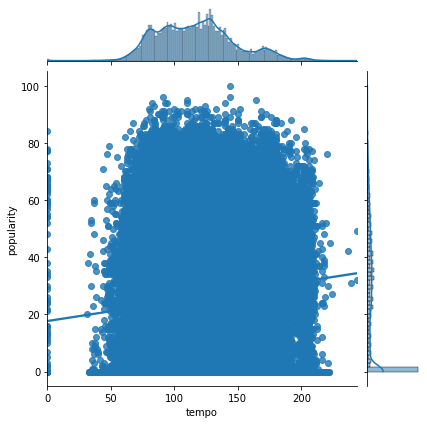

In [7]:
sns.jointplot(x='tempo', y='popularity', 
              data=df, kind='reg')

Популярны треки с темпом 90-160 bpm

In [4]:
top_artist = df.groupby('artists')[['popularity']].sum()\
    .sort_values('popularity', ascending = False).head()
top_artist.style.bar()

,popularity
artists,
['The Beatles'],19110
['Frank Sinatra'],17434
['Elvis Presley'],16998
['Fleetwood Mac'],15927
['The Rolling Stones'],15817


Группа "The Beatles" самая популярная в Spotify

<AxesSubplot:>

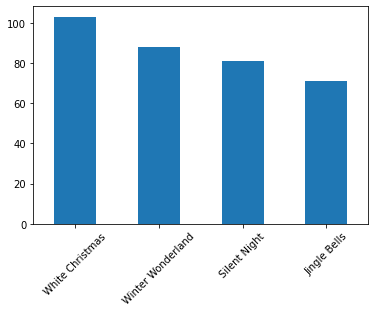

In [18]:
song_popularity = df['name'].value_counts().head(4)
song_popularity.plot(kind='bar', rot='45', y='Count')

Самая популярная песня - White Christmas

#### Выдвинем гипотезу: Самая популярная песня - самая танцевальная(danceability).
Доказательство: 

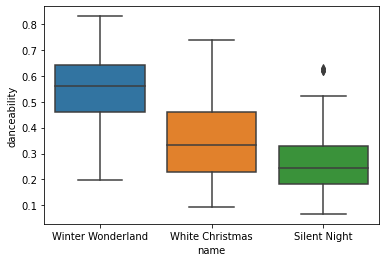

In [15]:
top_name = df.name.value_counts().sort_values(ascending=False).head(3).index.values
top_name
ax = sns.boxplot(x="name", y="danceability", 
            data=df[df.name.isin(top_name)])

<AxesSubplot:xlabel='artists'>

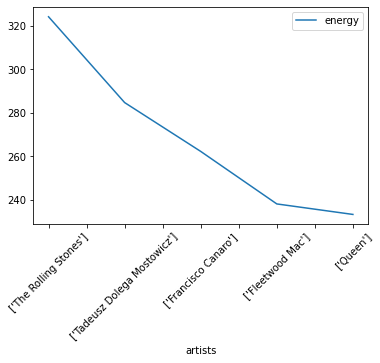

In [23]:


df1 = df.groupby('artists')[['energy']].sum()\
    .sort_values('energy', ascending = False).head(5)
df1.plot(rot=45)

Самые энергичные песни у группы The Rolling Stones

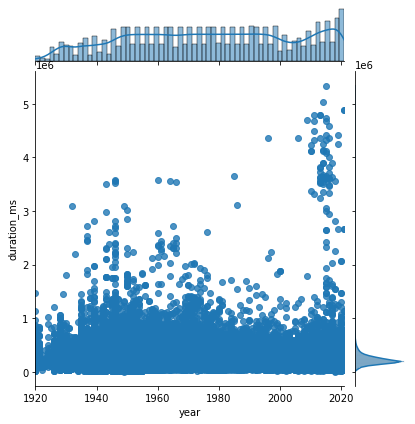

In [27]:
sns.jointplot(x='year', y='duration_ms', 
              data=df, kind='reg')


В 21 веке резко возросла продолжительность части треков

In [36]:
key_energy = df.pivot_table(
                        index='year', 
                        columns='key', 
                        values='tempo', 
                        aggfunc=sum).fillna(0).applymap(float)

key_energy

key,0,1,2,3,4,5,6,7,8,9,10,11
year,,,,,,,,,,,,
1920,4958.267,4767.523,4659.140,2333.960,2912.427,3690.127,1339.532,4491.641,2346.221,3011.492,2840.006,2165.852
1921,1451.322,1384.594,1575.335,1671.831,983.806,1392.949,1207.136,1608.264,1290.306,1632.458,1023.746,756.615
1922,2081.021,1008.549,842.054,272.707,1174.345,1924.485,290.353,1278.249,1137.229,862.195,1066.922,165.902
1923,2979.436,1719.051,1727.100,2229.584,1249.721,2834.901,1000.029,1978.708,1604.396,381.940,2093.941,1293.178
1924,3491.871,1009.930,2008.948,2059.524,1264.883,4050.170,1014.636,2773.815,3499.922,1656.338,4764.867,887.835
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,29802.329,30032.469,25125.000,7172.290,17605.196,17787.593,20030.681,28535.024,17924.961,27560.194,19828.967,21260.359
2018,33273.696,38891.527,28895.673,9877.996,25125.898,24724.075,25736.343,40999.748,22243.995,33055.597,25631.251,27114.799
2019,30477.561,30038.534,28248.678,7074.607,21503.935,23425.632,20010.343,33297.372,17571.735,29442.240,18753.892,25270.958


### key - клавиши на октаве. 0 - C, 1 - C# и т.д.

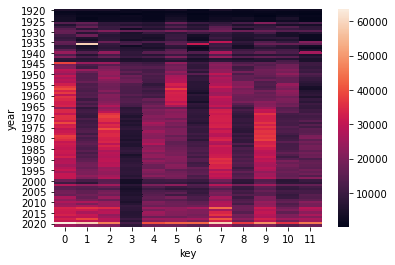

In [35]:
ax = sns.heatmap(key_energy)

На ре диез (key 3) не пишут энергичных треков. До, Ре и Фа диез (key 0, 1, 7) одни из энергичных тональностей. До 1925 года энергичность треков низка (мало данных)

In [39]:
data= df.groupby('artists')[['acousticness','instrumentalness', 'tempo','popularity']].sum()\
     .sort_values('popularity', ascending=False)
data.head()

,acousticness,instrumentalness,tempo,popularity
artists,,,,
['The Beatles'],148.069966,21.298074,50134.931,19110
['Frank Sinatra'],459.036710,5.455321,67935.254,17434
['Elvis Presley'],368.471800,26.829836,55272.961,16998
['Fleetwood Mac'],154.736241,56.395968,55451.006,15927
['The Rolling Stones'],133.463407,83.828272,55488.269,15817


array([[<AxesSubplot:xlabel='acousticness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='tempo', ylabel='acousticness'>,
        <AxesSubplot:xlabel='popularity', ylabel='acousticness'>],
       [<AxesSubplot:xlabel='acousticness', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='tempo', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>],
       [<AxesSubplot:xlabel='acousticness', ylabel='tempo'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='tempo'>,
        <AxesSubplot:xlabel='tempo', ylabel='tempo'>,
        <AxesSubplot:xlabel='popularity', ylabel='tempo'>],
       [<AxesSubplot:xlabel='acousticness', ylabel='popularity'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>,
        <AxesSubplot:xlabel='tempo', ylabel='popularity'>,
        <Axes

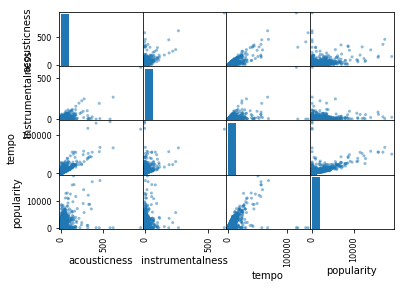

In [41]:
pd.plotting.scatter_matrix(data, alpha=0.5)

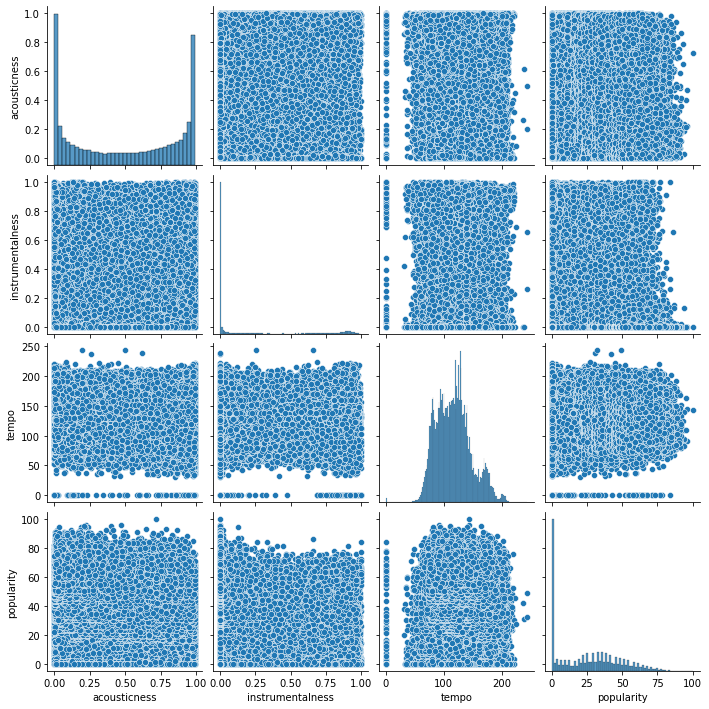

In [44]:

sns_plot = sns.pairplot(
    df[['acousticness','instrumentalness', 'tempo','popularity']])
sns_plot

Наибольшая популярность у треков с темпом 90-160.
Чем меньше инструментала, тем популярнее трек (?).
Популярность акустических немного выше инструментальных.